# Assignment VII: Principal Components Analysis

## Problem statement

In this project, we will use the $\texttt{Labeled Faces in the Wild (LFW)}$ dataset. For more details about the dataset, please refer to the descriptions in the assignment VI.

In [3]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

In [4]:
def plot_faces(images, tile, fig_size=(8, 5), disp_name=True):
    fig = plt.figure(figsize=fig_size)
    for i in range(tile[0] * tile[1]):
        ax = fig.add_subplot(tile[0], tile[1], i+1, xticks=[], yticks=[])
        ax.imshow(images[i], cmap='gray')
        if disp_name:
            ax.set_title(faces.target_names[faces.target[i]])
    plt.show()

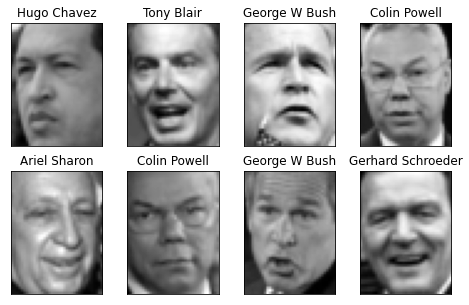

In [5]:
plot_faces(faces.images, tile=(2, 4))

In the assignemnt VI, we used the **eigenface** to extract the features for the face image. The eigenface representation provides a set of eigenvectors (i.e., orthonormal basis) for face images. This suggests that we can represent an arbitrary face image as a linear combination of the eigenvectors and corresponding coefficients. The eigenface representations could also be used to compress face images by projecting them onto the eigenface, discarding eigenvectors with small coefficients, and reconstructing the face images with limited eigenvectors. 

Let's apply a $\texttt{PCA}$ to decompose the face images in the $\texttt{LFW}$ dataset.

**NOTE**: To implement the $\texttt{PCA}$, exploiting ```sklearn.decompose``` (or equivalent) **will not be allowed**. You will get no credit otherwise.

### P1. Principal Component Analysis

P1.1 Implement the PCA (the ```PCA``` class). To compute the covariance matrix, and its corresponding eigenvalues and eigenvectors, you can use a ```numpy``` built-in function. Note that normally face images are standardized before applying a dimension reduction technique, and you should undo the standardization when reconstructing the original face images. *(40 points)*

P1.2 Run the code provided to plot the eigenfaces. Analyze the meaning of eigenfaces and corresponding eigenvalues. *(5 points)*

P1.3 Run the code provided to plot original face images, face images projected onto each component of eigenfaces, and reconstructed face images with eigenfaces. Analyze and contrast the differences between the original and reconstructed face images. Also describe the differences between results for the two examples. *(10 points)*

### P2. Face Recognition System

P2.1 Implement a face recognition system (the ```FaceRecognizer``` class). The face recognition system projects face images (i.e., training samples) onto eigenspace spanned by eigenfaces. It then saves the coefficients corresponding each eigenvector as a feature to represent the identity of a face image in the database. 

When we query a novel face image (i.e., test samples), the system projects the face images again onto the eigenspace, followed by extracting coefficients. We can identify the identity of the query face image, by retrieving the nearest neighbor (in terms of L2 norm) for the extracted coefficient in the database. *(20 points)*

P2.2 Run the code provided to plot the query faces and corresponding nearest faces in the database. *(5 points)*

---

## Results

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split

from PCA import *


faces = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

### Prepare Dataset

In [7]:
image_shape = faces.images[0].shape
X = faces.data
y = faces.target

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [9]:
print("X_train.shape: ", X_train.shape)
print("y_train.shape: ", y_train.shape)

X_train.shape:  (862, 1850)
y_train.shape:  (862,)


### P1.1

In [10]:
num_components = 150
pca = PCA(num_components=num_components)

In [11]:
pca.find_principal_components(X_train)

In [12]:
pca.eigenbasis[0].dot(pca.eigenbasis[5])
print("% 10f"% (pca.eigenbasis[0].dot(pca.eigenbasis[5])))

 -0.000000


In [13]:
print("% 10f"% pca.eigenbasis[5].dot(pca.eigenbasis[5]))

  1.000000


### Mean face image for training samples

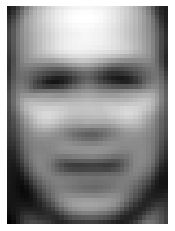

In [14]:
plt.imshow(pca.X_mean.reshape(image_shape), cmap='gray')
plt.axis('off')
plt.show()

### Standardized training samples

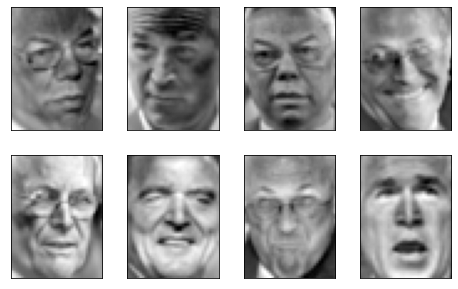

In [15]:
plot_faces(((X_train - pca.X_mean) / pca.X_std).reshape(X_train.shape[0], image_shape[0], image_shape[1]), tile=(2, 4), disp_name=False)

In [16]:
data_reduced = pca.reduce_dimensionality(X_train)
data_reduced.shape

(862, 150)

In [17]:
eigenbasis = pca.eigenbasis
eigenbasis.shape

(150, 1850)

---

### P1.2

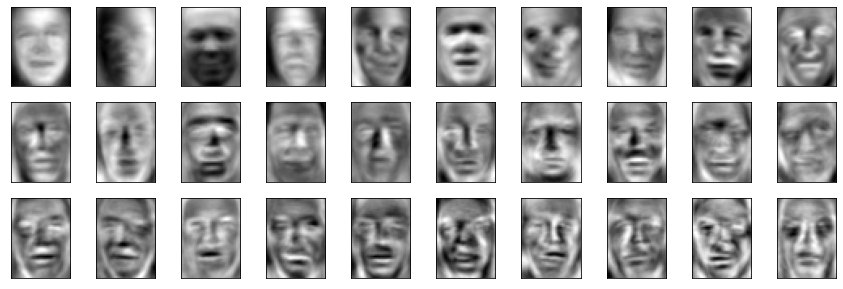

In [18]:
plot_faces(eigenbasis.reshape(num_components, image_shape[0], image_shape[1]), fig_size=(15, 5), tile=(3, 10), disp_name=False)

In [19]:
np.diag(eigenbasis.dot(eigenbasis.T))

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [20]:
diag = np.zeros((num_components, num_components))
np.fill_diagonal(diag, 1)
print("% 10f"% np.max(eigenbasis.dot(eigenbasis.T) - diag))

  0.000000


### Meaning of Eigenfaces and Corresponding Eigenvalues

Each eigenface is an eigenvector. Finding eigenvectors are same as finding new axis that can spread out the images. The new axis are also a vector in the original space (having the same dimension with the original images). Therefore, each eigenvector can be expressed as an image just like ordinary face images.

The eigenfaces that having largest corresponding eigenvalues show the basic structure of human faces. It is because, that vector goes through the center of vectors of human images. They have the largest eigenvalues because they go through human faces and make a big variance on the axis. Therefore, the vector shows the 'average' human face.

Eigenvectors with smaller corresponing eigenvalues show unique characteristics of human faces. It is because, those vectors goes through a particular set of human images. Note that all eigenvectors are orthonormal to each other. Therefore, these eigen vectors cannot go through the 'average' of ALL human images. Instead, they are placed through average of 'smaller groups' of human faces. As a result, these vectors show special characteristics in some human faces.

Eigenvectors with smallest eigenvalues show noise in the data. These axis does not show much information to us.

---

### P1.3

In [21]:
sample_decomposed = pca.reduce_dimensionality(X_test)[0]
sample_decomposed.shape

(150,)

In [22]:
representations_onto_eigenbasis, sample_reconstructed = pca.reconstruct_original_sample(sample_decomposed)

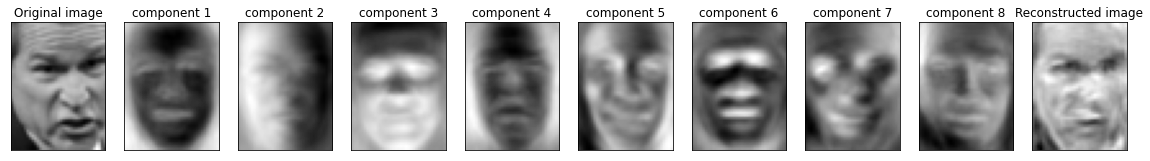

In [23]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 10, 1, xticks=[], yticks=[])
ax.imshow(X_test[0].reshape(image_shape), cmap='gray')
ax.set_title('Original image')
for i in range(8):
    ax = fig.add_subplot(1, 10, i+2, xticks=[], yticks=[])
    ax.imshow(representations_onto_eigenbasis[i, :].reshape(image_shape), cmap='gray')
    ax.set_title(f"component {i+1}")
ax = fig.add_subplot(1, 10, 10, xticks=[], yticks=[])
ax.imshow(sample_reconstructed.reshape(image_shape), cmap='gray')
ax.set_title('Reconstructed image')

plt.show()

In [24]:
sample_decomposed = pca.reduce_dimensionality(X_test)[100]
sample_decomposed.shape

(150,)

In [25]:
representations_onto_eigenbasis, sample_reconstructed = pca.reconstruct_original_sample(sample_decomposed)

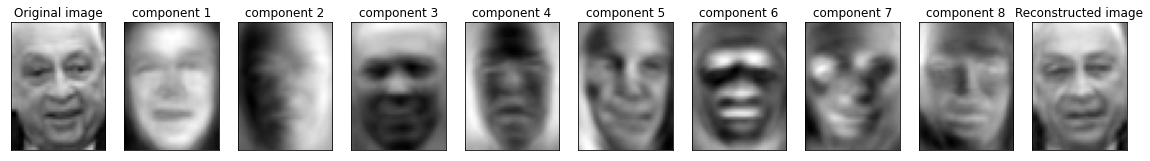

In [26]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(1, 10, 1, xticks=[], yticks=[])
ax.imshow(X_test[100].reshape(image_shape), cmap='gray')
ax.set_title('Original image')
for i in range(8):
    ax = fig.add_subplot(1, 10, i+2, xticks=[], yticks=[])
    ax.imshow(representations_onto_eigenbasis[i, :].reshape(image_shape), cmap='gray')
    ax.set_title(f"component {i+1}")
ax = fig.add_subplot(1, 10, 10, xticks=[], yticks=[])
ax.imshow(sample_reconstructed.reshape(image_shape), cmap='gray')
ax.set_title('Reconstructed image')

plt.show()

In the first example, we can see that the component 1 is dark. In contrast, the second example's component 1 is bright. This brightness of the 'components' show how much the image contains the component. For example, we can think about the cartessian coordinate. Vector (2, 3) has '2' of x component and '3' of y component. Just like this example, the image in the first example includes small component 1. The image in the second example includes a big component 1. This also means that the second image('s vector) is much more similar to the component 1 (vector).

This applies to the other components as well. Components that are bright means that the original image includes the component alot. If the component is dark (or inverted) means that the original image doesn't include the component much. This also means that the component's vector is not similar to the origianal image's vector.

The reconstructed image show a similar image to the original image. However, there are differences with the original image as well. This is because we reduced the number of axis to represent the data. As a result, the new dimension space cannot save all the data in the original image, loosing some data. However, the basic structure of each images are maintained. Changes were made in small details. It is because we selected eigenvectors with biggest eigenvalues. These eigenvectors stored the biggest data in the image. Unselected eigenvectors have smallest eigenvalues. This means that these eigenvectors do not store much data, but mostly noise in the data (in other words, details of the image). 

By using eigenvectors and the component values, we can reconstruct the vector in the original image space, making "Reconstructed image".

---

### P2.1

In [27]:
face_recognizer = FaceRecognizer(num_components=150, X=X_train, y=y_train)
face_recognizer.generate_database()

In [28]:
print(X_test.shape)
print(face_recognizer.database.shape)

(426, 1850)
(862, 150)


In [29]:
pred, distances, db_indices = face_recognizer.find_nearest_neighbor(X_test)

In [30]:
print(f"accuracy: {np.average(pred == y_test):0.4f}")

accuracy: 0.6080


In [31]:
pred.shape

(426,)

In [32]:
distances.shape

(426, 1)

In [33]:
db_indices.shape

(426,)

### P2.2

In [34]:
def plot_recognition_result(recognizer, X, y, num_queries=5, names=faces.target_names, image_shape=image_shape):
    indices = np.random.randint(low=X['test'].shape[0], size=num_queries)
    print(f"Sampled indices :{indices}")
    
    pred, distances, db_indices = face_recognizer.find_nearest_neighbor(X_test[indices, :])
    
    for i in range(num_queries):
        fig = plt.figure(figsize=(6, 4))
        
        plt.subplot(1, 2, 1)
        plt.imshow(X['test'][indices[i], :].reshape(image_shape), cmap='gray')
        plt.xticks([], [])
        plt.yticks([], [])
        plt.xlabel(f"Name: {names[y['test'][indices[i]]]} \n Prediction: {names[pred[i]]}")
        plt.title('Query')

        plt.subplot(1, 2, 2)
        plt.imshow(X['train'][db_indices[i], :].reshape(image_shape), cmap='gray')
        plt.xticks([], [])
        plt.yticks([], [])
        plt.xlabel(f"Name: {names[y['train'][db_indices[i]]]} \n Distance: {distances[i].item():0.2f}")
        plt.title('Prediction')
        
        plt.show()


Sampled indices :[410 174  33  68 381]


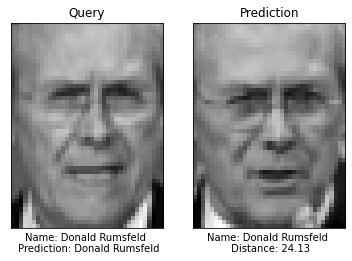

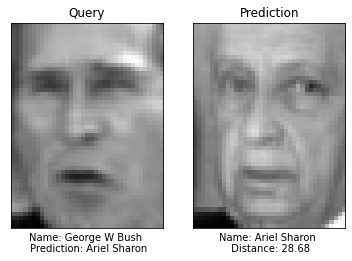

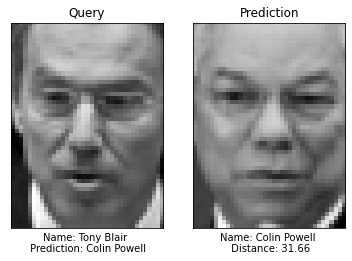

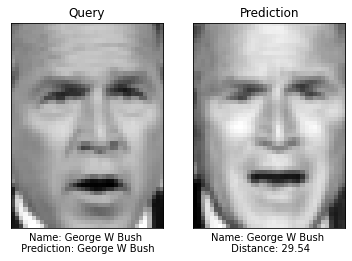

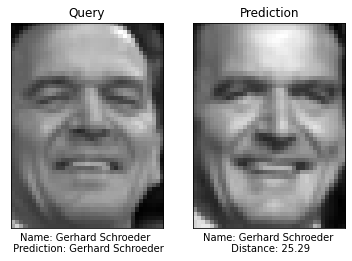

In [35]:
np.random.seed(555)
X = {'train': X_train, 'test': X_test}
y = {'train': y_train, 'test': y_test}
plot_recognition_result(face_recognizer, X, y)

The above figure show NN classifying results of selected human face images. In this example, distances were calculated between PCA results of each images. As mentioned above, PCA selects new axis that are fundamental in human face expression. By using PCA results instead of the original image helps us to concentrate more in these fundamental components. Therefore, we can find images that are truly close to the Query image.

As a result, the example was able to find the closest image for each Query image. From P2.1, the test accuracy of this model was about 61%. It shows a clear increase of accuracy than using original images (which was about 50%).

However, there were still some misclassifications. This may be reduced when we use K-NN algorithm instead of finding the nearest neighbor.

---

## Discussion (20 points)

Your answer must include

- The curse of dimensionality.
- Feature selection vs. feature extraction.
- Explanation of PCA.
- How the PCA can deal with noisy informations (e.g., face images with sunglasses and/or medical mask,...).
- Analysis on the limitations of PCA.
    
For analysis and discussion, you can exploit all functions you've written or make your own functions (or scripts).

## 1. Curse of Dimensionality


A model that uses more dimensions can make better results because it can consider more data to make it's decision. For example, we can make better inferences about a house when we have more information about the house. However, when the model use more dimensions, it needs more data to be trained. It is because the space of the data increases exponentially as the dimension increases. In other words, we need much more data to fill in the bigger space. If there aren't enough information, be easily affected by noise (because there aren't enough data for the area.)

Therefore, it may be better to reduce the dimension of the model (and therefore the input data as well). The PCA implementation above is an example of reducing the dimension. The original image's dimension is equal to the number of pixels in the image. Therefore, the dimension is too large relative to given training data set. Therefore, PCA was applyed to the images to reduce the dimension of training data.

## 2. Feature Selection and Feature Extraction

Feature Selection is **selecting** features. For example, when 20 features were given, we select 10 out of them. In other hand, feature extraction **extracts** features. The main difference of feature extraction is that we make new features from the given data. The extracted feature did not exist in the original data (It was hidden inside the data). 

PCA generates new features. We find new eigenvectors from the original data and use them as new features. It is important that the new features (extracted features) do a good job in splitting the data. In PCA, we find and choose axes that make the biggest variance.

## 3. PCA

PCA is used to find new features that maximizes the variance of features. By using these features, we can reduce the number of features and solve curse of dimensionality problem. 

There are various ways to find new features. In the example above - applying K-NN - we need to find axis that can save the most data after dimension is reduced. Therefore, we need to find axes in signal representation matter. In other words, we need to find axes that can spread out the data points as far as possible from each other, so that their unique data is saved.

The axes that spreads the data as far as possible to each other (=that makes the biggest variance) are actually eigenvectors of the covariance matrix of data that has the largest corresponding eigenvalues. The eigenvalues are equal to the projected variance. Therefore, the bigger the eigenvalue is, the bigger variance we can get from the projection on the eigenvector (axis). Since we need to find axes with biggest variance, we choose eigenvectors with biggest eigenvalues.

Then, we can project each samples on the new space using the selected eigenvalues. Since the chosen eigenvectors are smaller than the original dimension, we are reducing the dimension here. However, the data is preserved as much as possible.

## 4. Noisy Informations

The number of eigenvectors that PCA finds are equal to the dimension of the original data. Among those vectors, we select some eigenvectors that has the largest eigenvalues.

As mentioned above, the eigenvectors that has the largest eigenvalues represents the 'fundamental shape' of human faces. Therefore, these vectors are affected small by the noises. If the given image is similar to human faces, these vectors will still show big components. 

The eigenvectors with smallest eigenvalues are the ones that represent noise in some images. These eigenvectors are heading only to small number of data samples, which includes noise in the data. As a result, these vectors are greatly affected by noise in the data. 

Therefore, if we select eigenvectors with large eigenvalues, we can make the model strong against noise in the data. If we select very small number of eigenvectors, we can see if the image is an image of a human. However, if we use too small number of eigenvectors, too much data is lost and we may not be able to distinguish people.


## 5. Limitations of PCA

As mentioned above, PCA finds axes that maximizes the variance. This is to save the data as much as possible, in the signal representation perspective. However, this method does not take into account the 'class label's. As a result, it may not be the best option in classifying perspective.

When we are trying to classify given data, we need to find axes that can seperate the labels as much as possible. How much data saved after dimension is reduced is not important as long as we can classify better. Therefore, how labels get distributed by dimension reduction is very important. However, PCA only concentrates on spreading the whole data out. As a result, labels may be mixed all together and is harder to classify the data.

The method that concentrates on 'labels' is LDA. This method finds axes that can seperate the labels as much as possible. As a result, these axes may give better results in classifying.

Therefore, the concept of 'spreading samples as much as possible' in PCA is reasonable, but there may be better choices for each purposes.

---